In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SKUP\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
index = pd.MultiIndex.from_product([['a','c','b'],[1,2]])
data = pd.Series(np.random.rand(6),index=index)
data.index.names = ["char","int"]
data

char  int
a     1      0.042877
      2      0.947513
c     1      0.594781
      2      0.833978
b     1      0.656318
      2      0.483076
dtype: float64

In [5]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [8]:
data = data.sort_index()

In [9]:
data['a':'b']

char  int
a     1      0.042877
      2      0.947513
b     1      0.656318
      2      0.483076
dtype: float64

In [10]:
index = [('California', 2000), ('California', 2010),
 ('New York', 2000), ('New York', 2010),
 ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
 18976457, 19378102,
 20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [12]:
indx = pd.MultiIndex.from_tuples(index)

In [21]:
pop_df = pop.reindex(indx)
pop_df.index.names = ["state","year"]
pop_df

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [22]:
pop_df.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [23]:
pop_df.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [24]:
pop_df.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [25]:
pop_flat = pop_df.reset_index(name="population")
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [27]:
pop_flat.set_index(["state","year"])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [28]:
index = pd.MultiIndex.from_product([[2013,2014],[1,2]],names=["year","visit"])
columns = pd.MultiIndex.from_product([["Bob","Guido","Sue"],["HR","Temp"]],names=["subject","type"])
data = np.round(np.random.randn(4,6),1)
data[:,::2]*=10
data+=37
health_data = pd.DataFrame(data,index=index,columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  36.9  45.0  36.3  33.0  37.5
     2      28.0  38.0  39.0  36.7  47.0  37.6
2014 1      29.0  38.0  30.0  36.6  38.0  37.2
     2      45.0  35.3  41.0  39.1  35.0  37.2

In [30]:
data_mean = health_data.mean(level="year")
data_mean

C:\Users\SKUP\AppData\Local\Temp/ipykernel_14080/395314522.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level="year")


subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     35.0  37.45  42.0  36.50  40.0  37.55
2014     37.0  36.65  35.5  37.85  36.5  37.20

In [31]:
data_mean_type = health_data.mean(axis=1,level="type")
data_mean_type

C:\Users\SKUP\AppData\Local\Temp/ipykernel_14080/2960352694.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean_type = health_data.mean(axis=1,level="type")


type               HR       Temp
year visit                      
2013 1      40.000000  36.900000
     2      38.000000  37.433333
2014 1      32.333333  37.266667
     2      40.333333  37.200000

In [36]:
def make_df(cols,inds):
    """quickly make dataframe"""
    data = {c:[str(c)+str(i) for i in inds] for c in cols}
    return pd.DataFrame(data,inds)

In [37]:
make_df('ABC',range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [38]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
x1 = [[1,2],[4,5]]
np.concatenate([x1,x1],axis=1)

array([[1, 2, 1, 2],
       [4, 5, 4, 5]])

In [41]:
ser1 = pd.Series(['A','B','C'],index=[1,2,3])
ser2 = pd.Series(['D','E','F'],index=[4,5,6])
pd.concat([ser1,ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [45]:
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[3,4])
print(df1,"\n",df2,"\n")
print(pd.concat([df1,df2]))

    A   B
1  A1  B1
2  A2  B2 
     A   B
3  A3  B3
4  A4  B4 

    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [50]:
df3 = make_df('AB',[0,1])
df4 = make_df('CD',[0,1])
print(df3)
print(df4)

print(pd.concat([df3,df4],axis=1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [66]:
df5 = make_df('AB',[0,1])
df6 = make_df('AB',[2,3])

print(df5)
print(df6)
print(pd.concat([df5,df6],ignore_index=False))

    A   B
0  A0  B0
1  A1  B1
    A   B
2  A2  B2
3  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [60]:
try:
    pd.concat([df5,df6],verify_integrity=True)
except ValueError as e:
    print("value error",e)

In [69]:
df7 = make_df('ABC',[1,2])
df8 = make_df('BCD',[3,4])
print(df7)
print(df8)

print(pd.concat([df6,df7]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    A   B    C
2  A2  B2  NaN
3  A3  B3  NaN
1  A1  B1   C1
2  A2  B2   C2


In [70]:
print(pd.concat([df6,df7], join="inner"))

    A   B
2  A2  B2
3  A3  B3
1  A1  B1
2  A2  B2


In [71]:
print(pd.concat([df6,df7], join_axes=[df7.columns]))

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [72]:
print(df1)
print(df2)

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4


In [73]:
df1.append(df2)

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [75]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
 'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [78]:
df3 = pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [81]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
 'supervisor': ['Carly', 'Guido', 'Steve']})
print(df4)

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


In [80]:
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [85]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
 'Engineering', 'Engineering', 'HR', 'HR'],
'skills': ['math', 'spreadsheets', 'coding', 'linux',
 'spreadsheets', 'organization']})
print(df1)
print(df5)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization


In [84]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [87]:
print(df1)
print(df2)
print(pd.merge(df1,df2,on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [89]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'salary': [70000, 80000, 120000, 90000]})
print(df3)
print(df1)

print(pd.merge(df1,df3,left_on="employee",right_on="name"))

   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [92]:
print(pd.merge(df1,df3,left_on="employee",right_on="name").drop('name',axis=1))

  employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000


In [93]:
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [95]:
df1a = df1.set_index("employee")
print(df1a)
df2a = df2.set_index("employee")
print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [96]:
pd.merge(df1a,df2a,left_index=True,right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [97]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [99]:
print(df1a)
print(df3)

pd.merge(df1a,df3,left_index=True,right_on="name")

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [101]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
 'food': ['fish', 'beans', 'bread']},
 columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
 'drink': ['wine', 'beer']},
 columns=['name', 'drink'])

print(df6)
print(df7)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


In [102]:
pd.merge(df6,df7)

,name,food,drink
0,Mary,bread,wine


In [103]:
pd.merge(df6,df7,how="inner")

,name,food,drink
0,Mary,bread,wine


In [104]:
pd.merge(df6,df7,how="outer")

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [105]:
pd.merge(df6,df7,how="left")

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [106]:
pd.merge(df6,df7,how="right")

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


In [107]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'rank': [3, 1, 4, 2]})
print(df8)
print(df9)

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


In [108]:
pd.merge(df8,df9,on="name")

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [109]:
pd.merge(df8,df9,on="name",suffixes=['_L','_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [110]:
pop = pd.read_csv("notebooks_v1/data/state-population.csv")
areas = pd.read_csv("notebooks_v1/data/state-areas.csv")
abbrevs = pd.read_csv("notebooks_v1/data/state-abbrevs.csv")

print(pop.head())
print(areas.head())
print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [115]:
merged = pd.merge(pop,abbrevs,left_on="state/region",right_on="abbreviation",how="outer")
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [116]:
merged = merged.drop("abbreviation",axis=1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [118]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [121]:
merged[merged['population'].isnull()].head(2)

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN


In [122]:
merged.loc[merged['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [123]:
merged.loc[merged['state/region']=='PR','state'] = 'Puerto Rico'
merged.loc[merged['state/region']=='USA','state'] = 'United States'

In [124]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [127]:
#print(merged)
#print(areas)
final = pd.merge(merged,areas,on='state',how="left")
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [128]:
final.isna().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [130]:
final.loc[final['area (sq. mi)'].isnull(),'state'].unique()

array(['United States'], dtype=object)

In [131]:
final.dropna(inplace=True)

In [133]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [140]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [141]:
data2010.set_index("state",inplace=True)

In [144]:
density = data2010['population']/data2010['area (sq. mi)']
density.sort_values(ascending=False,inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [145]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [147]:
planets = sns.load_dataset("planets")

In [150]:
print(planets.head())
print(planets.shape)

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
(1035, 6)


In [160]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [152]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [153]:
ser.sum()

2.811925491708157

In [154]:
ser.mean()

0.5623850983416314

In [155]:
df = pd.DataFrame({'A':rng.rand(5) , 'B':rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [156]:
df.sum()

A    2.389442
B    2.217101
dtype: float64

In [157]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [159]:
df.sum(axis="columns")

0    0.176579
1    1.027993
2    1.698619
3    0.813454
4    0.889898
dtype: float64

In [162]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
 'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [164]:
df.groupby("key").sum()

,data
key,
A,3
B,5
C,7


In [165]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [167]:
planets.groupby('method')['orbital_period']

In [168]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [170]:
for (method,group) in planets.groupby("method"):
    print(method,":",group.shape)

Astrometry : (2, 6)
Eclipse Timing Variations : (9, 6)
Imaging : (38, 6)
Microlensing : (23, 6)
Orbital Brightness Modulation : (3, 6)
Pulsar Timing : (5, 6)
Pulsation Timing Variations : (1, 6)
Radial Velocity : (553, 6)
Transit : (397, 6)
Transit Timing Variations : (4, 6)


In [171]:
planets.groupby("method")['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [174]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key':['A','B','C','A','B','C'], 'data1':range(6),'data2':rng.randint(0,10,6)},columns=['key','data1','data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [176]:
df.groupby("key").aggregate(['min',np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [178]:
df.groupby("key").aggregate({'data1':'min','data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [179]:
def func_filter(x):
    return x['data2'].std() > 4

In [180]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [181]:
df.groupby('key').filter(func_filter)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [182]:
df.groupby("key").transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [183]:
def norm(x):
    x['data1']/=x['data2'].sum()
    
    return x

In [184]:
df.groupby('key').apply(norm)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [185]:
L = [0, 1, 0, 1, 2, 0]

In [186]:
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


In [187]:
df.groupby('key').sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [189]:
df2 = df.set_index("key")
df2

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


In [190]:
mapping = {'A':"Vowel",'B':"Consonents",'C':"Consonents"}

In [191]:
df2.groupby(mapping).sum()

,data1,data2
key,,
Consonents,12,19
Vowel,3,8


In [192]:
df2.groupby(str.lower).mean()

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [193]:
df2.groupby([str.lower,mapping]).mean()

,,data1,data2
key,key,,
a,Vowel,1.5,4.0
b,Consonents,2.5,3.5
c,Consonents,3.5,6.0


In [194]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [195]:
decade = 10*(planets['year']//10)
decade = decade.astype(str)+'s'
decade.name = "decades"
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [196]:
planets.groupby(["method",decade])['number'].sum().unstack().fillna(0)

decades,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [197]:
data_titanic = sns.load_dataset("titanic")

In [198]:
data_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [199]:
data_titanic.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


In [201]:
data_titanic.groupby(["sex","class"])["survived"].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [202]:
data_titanic.groupby(["sex","class"])["survived"].aggregate("mean").unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [203]:
data_titanic.pivot_table(values="survived",index="sex",columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [206]:
age = pd.cut(data_titanic['age'],[0,18,80])

In [207]:
data_titanic.pivot_table(values="survived",index=['sex',age],columns="class")

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [209]:
fare = pd.qcut(data_titanic['fare'],2)

In [210]:
data_titanic.pivot_table(values="survived",index=["sex",age],columns=["class",fare])

class                      First                             Second  \
fare            (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
sex    age                                                            
female (0, 18]               NaN          0.909091         1.000000   
       (18, 80]              NaN          0.972973         0.880000   
male   (0, 18]               NaN          0.800000         0.000000   
       (18, 80]              0.0          0.391304         0.098039   

class                                        Third                    
fare            (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
sex    age                                                            
female (0, 18]           1.000000         0.714286          0.318182  
       (18, 80]          0.914286         0.444444          0.391304  
male   (0, 18]           0.818182         0.260870          0.178571  
       (18, 80]          0.030303         0.125000          0.192308

In [213]:
data_titanic.pivot_table(index="sex",columns="class",aggfunc={"survived":sum,"fare":'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [214]:
data_titanic.pivot_table(values="survived",index="sex",columns="class",margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [215]:
births = pd.read_csv("notebooks_v1/data/births.csv")

In [216]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [217]:
births['decade'] = 10*(births['year']//10)

In [220]:
births.pivot_table(values="births",index="decade",columns="gender",aggfunc="sum")

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


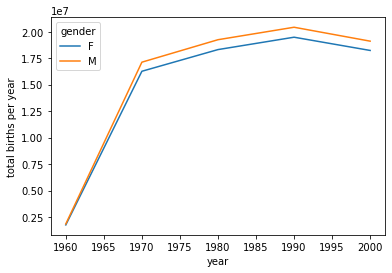

In [221]:
births.pivot_table(values="births",index="decade",columns="gender",aggfunc="sum").plot()
plt.ylabel("total births per year")
plt.xlabel("year")
plt.show()

In [222]:
quartiles = np.percentile(births['births'],[25,50,75])

In [224]:
mu = quartiles[1]
sig = 0.75*(quartiles[2]-quartiles[0])

In [230]:
births = births.query("(births > @mu - 5*@sig) & (births < @mu +5*@sig)")
births['day'] = births['day'].astype(int)

In [231]:
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day,format='%Y%m%d')

In [233]:
births['dayofweek'] = births.index.dayofweek

C:\Users\SKUP\AppData\Local\Temp/ipykernel_14080/645263590.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["mon","tue","wed","thurs","fri","sat","sun"])


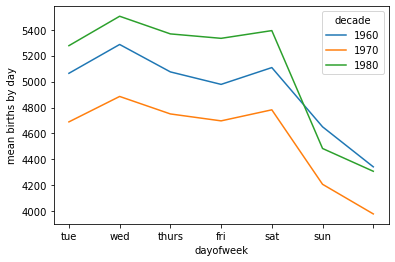

In [234]:
births.pivot_table('births',index="dayofweek",columns="decade",aggfunc="mean").plot()
plt.gca().set_xticklabels(["mon","tue","wed","thurs","fri","sat","sun"])
plt.ylabel("mean births by day")
plt.show()

In [246]:
births_by_date = births.pivot_table('births',[births.index.month,births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [247]:
births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

C:\Users\SKUP\AppData\Local\Temp/ipykernel_14080/2099517007.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012,month,day) for (month,day) in births_by_date.index]


In [248]:
births_by_date

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


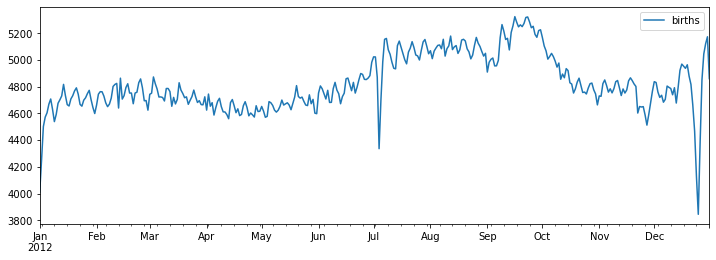

In [249]:
fig,ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)
plt.show()

In [251]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']

[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [252]:
data1 = ['peter', 'Paul', 'MARY', None,'gUIDO']
[s.capitalize() for s in data1]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [253]:
names = pd.Series(data1)
names

0    peter
1     Paul
2     MARY
3     None
4    gUIDO
dtype: object

In [254]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3     None
4    Guido
dtype: object

In [255]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
 'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [256]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [257]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [259]:
monte.str.startswith("T")

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [260]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [262]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [263]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [264]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [265]:
monte.str.slice(0,3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [266]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [268]:
full_monte = pd.DataFrame({'name': monte,
 'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
 'B|C|D']})

full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [269]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1
